In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

import matplotlib.pyplot as plt 

In [3]:
sns.set(color_codes = True)
plt.style.use("seaborn-whitegrid")

In [4]:
data = pd.read_csv('Number_4.txt', sep = "  ", header = None)

/Users/anacriel/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
data_vec = data.values.flatten()
data_vec

array([2.5217541e-01, 7.9250846e-01, 1.0066616e-01, 1.2315810e-01,
       7.4583717e-01, 2.8327408e+00, 2.3278622e-01, 1.1127354e+00,
       1.4274152e+00, 1.3373784e+00, 5.6646486e-02, 2.1032705e-01,
       1.5651400e+00, 1.5934244e+00, 6.3393846e-02, 3.2760875e-01,
       1.4959911e-01, 2.0470280e+00, 1.7394108e-02, 2.0074706e+00,
       3.9931954e-01, 2.0238399e+00, 5.0323319e+00, 2.7391897e+00,
       4.3615141e+00, 4.6223650e-03, 5.4693743e-01, 9.8298016e-01,
       1.1396645e-02, 1.5125014e+00, 1.3176543e+00, 2.8713537e-01,
       1.8503878e-02, 1.0792601e-01, 1.2225260e-01, 1.1301830e+00,
       3.6705350e-02, 9.2952841e-03, 1.2572116e+00, 1.4898966e-01,
       3.4690931e-01, 3.0214260e-01, 6.4176636e-01, 2.3673612e+00,
       6.5406626e-02, 2.3693005e+00, 2.2466320e-01, 3.1865818e+00,
       9.4968394e-03, 1.1884773e+00, 1.2030597e+00, 5.4489350e-02,
       2.7324536e-01, 1.2161412e-01, 9.9323336e-01, 3.7822516e-01,
       3.1547647e+00, 4.2115819e-01, 4.8395055e-01, 5.3011041e

In [6]:
print(f"max: {np.max(data_vec)}\n"
      f"min: {np.min(data_vec)}")

max: 5.0323319
min: 0.004622365


<BarContainer object of 6 artists>

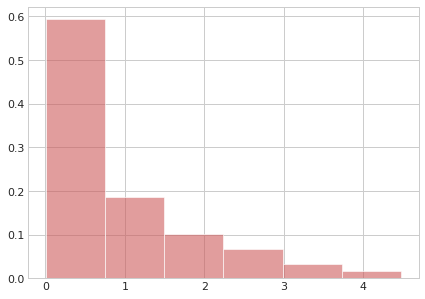

In [7]:
n = data_vec.shape[0] 
n_bins = np.sqrt(n) - 1

plt.figure(figsize = (7, 5))

bin_width_s = (np.max(data_vec) - np.min(data_vec)) / n_bins
bins_s = np.arange(np.min(data_vec), np.max(data_vec), bin_width_s)

hist_s, edges_s = np.histogram(data_vec, bins_s)
freq_s = hist_s / float(hist_s.sum())

plt.bar(bins_s[:-1], freq_s, width = bin_width_s, align = "edge", 
        color = "indianred", alpha = 0.6)

In [8]:
hist_s

array([35, 11,  6,  4,  2,  1])

In [9]:
for _ in range(2):
    data_vec = np.delete(data_vec, np.where(data_vec == np.max(data_vec)))

In [10]:
n = data_vec.shape[0] 
print(f"Sample size: {n}")
print(f"max: {np.max(data_vec)}\n"
      f"min: {np.min(data_vec)}")

Sample size: 58
max: 3.1865818
min: 0.004622365


In [11]:
def hist_from_dist(dist_params, samp_size, distr = "poisson", n_bins = 0):
    np.random.seed(seed = 40)
    
    if n_bins == 0:
        n_bins = np.sqrt(samp_size)
    
    if distr == "poisson":
        sample = st.poisson.rvs(mu = dist_params["mu"], size = samp_size)
    elif distr == "chisq":
        sample = st.chi2.rvs(df = dist_params["df"], size = samp_size)
    elif distr == "gamma":
        sample = st.gamma.rvs(a = dist_params["a"],
                              size = samp_size)
    else:
        sample = st.gaussian.rvs(loc = 0, scale = 1, size = samp_size)
    
    bin_width = (np.max(sample) - np.min(sample)) / n_bins
    bins = np.arange(np.min(sample), np.max(sample), bin_width)

    hist, edges = np.histogram(sample, bins)
    
    return bin_width, bins, hist

In [12]:
n_bins = 5

In [13]:
bin_width_s = (np.max(data_vec) - np.min(data_vec)) / n_bins
bins_s = np.arange(np.min(data_vec), np.max(data_vec), bin_width_s)

hist_s, edges_s = np.histogram(data_vec, bins_s)
freq_s = hist_s / float(hist_s.sum())

Check that frequences are >= than 5

In [14]:
hist_s

array([33, 10,  6,  5])

In [33]:
# Generate Chi-square data (df = 1)
n_chi = 600
bin_width_chi, bins_chi, hist_chi = hist_from_dist(dist_params = {"df": 1}, 
                                               samp_size = n_chi, 
                                               distr = "chisq",
                                               n_bins = n_bins)
print(hist_chi)
freq_chi = hist_chi / float(hist_chi.sum())

# Generate Chi-square data (df = 2)
n_chi2 = 600
bin_width_chi2, bins_chi2, hist_chi2 = hist_from_dist(dist_params = {"df": 2}, 
                                             samp_size = n_chi2, 
                                             distr = "chisq",
                                             n_bins = n_bins)
print(hist_chi2)
freq_chi2 = hist_chi2 / float(hist_chi2.sum())

[499  76  17   5]
[399 135  41  17]


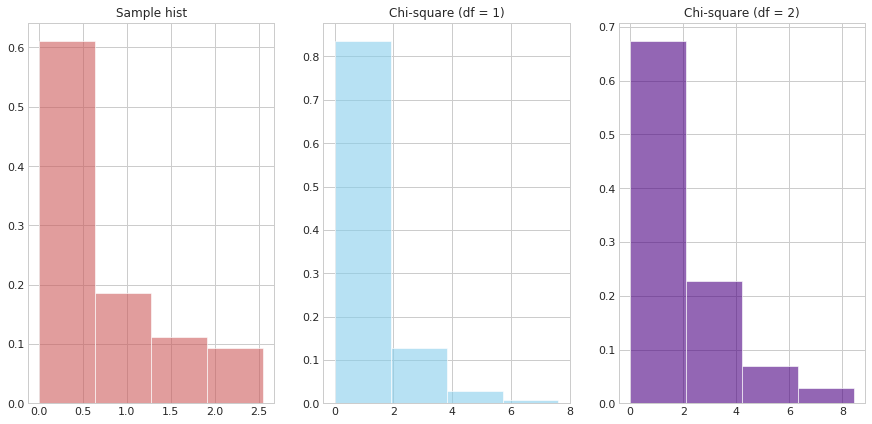

In [34]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))

legends = ["Sample hist", "Chi-square (df = 1)", 
           "Chi-square (df = 2)"]

# Plot histograms
axs[0].bar(bins_s[:-1], freq_s, width = bin_width_s, align = "edge", 
        color = "indianred", alpha = 0.6)
axs[1].bar(bins_chi[:-1], freq_chi, width = bin_width_chi, align = "edge", 
        color = "skyblue", alpha = 0.6)
axs[2].bar(bins_chi2[:-1], freq_chi2, width = bin_width_chi2, align = "edge", 
        color = "indigo", alpha = 0.6)

for i in range(3):
    axs[i].set_title(legends[i])
    axs[i].grid(True)
    
plt.grid(True)

In [35]:
st.chisquare(freq_s, f_exp = freq_chi)

Power_divergenceResult(statistic=1.173399641081651, pvalue=0.759390988497517)

In [36]:
st.chisquare(freq_s, f_exp = freq_chi2)

Power_divergenceResult(statistic=0.18130007899782483, pvalue=0.9805501081381843)

In [37]:
freq_s

array([0.61111111, 0.18518519, 0.11111111, 0.09259259])

In [38]:
freq_chi2

array([0.67398649, 0.22804054, 0.06925676, 0.02871622])